In [12]:
import numpy as np
import scipy as sp
import os 
import sys
import importlib
import copy
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
util_path = 'C:/ASM/Dropbox/Developments/Jupyter/Eating/myutils' if 'C:' in os.getcwd() else './myutils'
sys.path.append(util_path)
import my_file_utils as mfileu
import my_data_process_utils as mdpu
import my_classification_utils as mcu
#importlib.reload()

In [14]:
annots = mfileu.read_file('data', 'lab_annots_steven_right.pkl')
all_ssilv = mfileu.read_file('generated_for_result', 'all_ssilv.pkl')
all_proba = mfileu.read_file('generated_for_result', 'all_proba.pkl')
all_pct_proba = mfileu.read_file('generated_for_result', 'all_pct_proba.pkl')
all_frames = mfileu.read_file('generated_for_result', 'all_frames.pkl')

all_ssilv_lab = all_ssilv["lab"]
all_proba_lab = all_proba["lab"]
all_pct_proba_lab = all_pct_proba["lab"]
all_frames_lab = all_frames["lab"]

In [15]:
######## Histogram for positive and negative frame #########

In [16]:
l, r, o = np.zeros((0, )), np.zeros((0, )), np.zeros((0, ))
for subj in range(len(annots)):
    for sess in range(len(annots[subj])):
        x = all_ssilv_lab[subj][sess][:, 3]        
        l = np.concatenate((l, x))
        
        p = all_proba_lab["RF"][subj][sess][:, 1]
        r = np.concatenate((r, p))
        assert len(x)==len(p)  
        
        p = all_proba_lab["our"][subj][sess][:, 1]
        o = np.concatenate((o, p))
        assert len(x)==len(p)

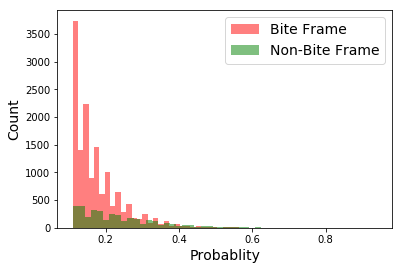

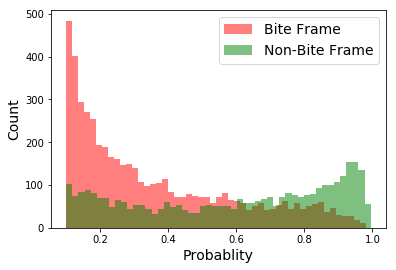

In [17]:
pos = r[l==1]
neg = r[l!=1]
pos = pos[pos>0.1]
neg = neg[neg>0.1]
plt.hist(neg, bins=50, alpha=0.5, label='Bite Frame', color='red')
plt.hist(pos, bins=50, alpha=0.5, label='Non-Bite Frame', color='green')

plt.xlabel('Probablity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(fontsize=14)
plt.show()

pos = o[l==1]
neg = o[l!=1]
pos = pos[pos>0.1]
neg = neg[neg>0.1]
plt.hist(neg, bins=50, alpha=0.5, label='Bite Frame', color='red')
plt.hist(pos, bins=50, alpha=0.5, label='Non-Bite Frame', color='green')

plt.xlabel('Probablity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(fontsize=14)

plt.show()


In [18]:
#################################################################
################## Boxplot of percentile Probability

[99.  99.1 99.2 99.3 99.4 99.5 99.6 99.7 99.8 99.9]


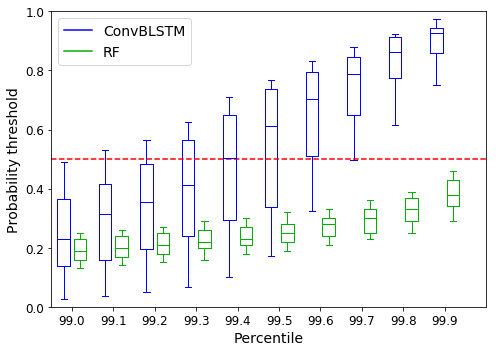

In [21]:
ticks = list(range(9900, 10000, 10))
ticks = np.array(ticks)/100
print(ticks)

count = len(ticks)
data_a = np.zeros((count, 13))
data_b = np.zeros((count, 13))
for i in range(count):    
    p = all_pct_proba_lab["our"]    
    data_a[i, :] = p[p[:, 2]==ticks[i], -2]
    p = all_pct_proba_lab["RF"]    
    data_b[i, :] = p[p[:, 2]==ticks[i], -2]

data_a = data_a.tolist()
data_b = data_b.tolist()

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

#plt.figure()
fig = plt.figure(figsize=(7,5))
ax = plt.subplot(111)  

bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0-0.4, sym='', widths=0.6)
bpr = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#0000FF') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#00AF00')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#0000FF', label='ConvBLSTM')
plt.plot([], c='#00AF00', label='RF')
plt.legend(fontsize=14)

plt.axhline(y=0.5, color='r', linestyle='--')

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12)       
    #tick.label.set_rotation('vertical')

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 


plt.xlabel("Percentile", fontsize=14)     
plt.ylabel("Probability threshold", fontsize=14)        

#plt.title(off_on, fontsize=16)
plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-1, len(ticks)*2)
plt.ylim(0, 1)
plt.tight_layout()
